In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#For better visualization 

In [3]:

from itertools import combinations # For visualization columns combination.

# For Chi Square test
from scipy.stats import chi2_contingency

# For spliting the dataset into Training and testing.
from sklearn.model_selection import train_test_split

# Naive Bayes ALgorithm
from sklearn.naive_bayes import BernoulliNB

# For Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from warnings import filterwarnings
filterwarnings('ignore')


*Exploratory data analysis *

In [6]:
df=pd.read_csv("/kaggle/input/play-badminton/badminton_dataset.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No


In [7]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play_Badminton'], dtype='object')

In [9]:
df.dtypes

Outlook           object
Temperature       object
Humidity          object
Wind              object
Play_Badminton    object
dtype: object

In [17]:
df.shape


(36, 5)

In [19]:
# Getting the number of rows and columns
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

''' As the dataset has the categorical columns so let include the object datatype for summary statistic'''
summary = df.describe(include='object')
print(summary)

Number of rows: 36
Number of columns: 5
         Outlook Temperature Humidity  Wind Play_Badminton
count         36          36       36    36             36
unique         3           3        2     2              2
top     Overcast        Cool     High  Weak             No
freq          12          12       18    18             24


In [20]:
for column in df.select_dtypes(include=['object']).columns:
    print(f'\n count for {column}:')
    print(df[column].value_counts())


 count for Outlook:
Outlook
Overcast    12
Sunny       12
Rain        12
Name: count, dtype: int64

 count for Temperature:
Temperature
Cool    12
Mild    12
Hot     12
Name: count, dtype: int64

 count for Humidity:
Humidity
High      18
Normal    18
Name: count, dtype: int64

 count for Wind:
Wind
Weak      18
Strong    18
Name: count, dtype: int64

 count for Play_Badminton:
Play_Badminton
No     24
Yes    12
Name: count, dtype: int64


Data cleaning


1.Missing values 

In [22]:
df.isnull().sum()

Outlook           0
Temperature       0
Humidity          0
Wind              0
Play_Badminton    0
dtype: int64

#it means there are no missing values 

2>oulier detection

In [ ]:
#here as all are the categorical data instead of numerical data so  there is is no requirement for finding the outlier if need to fing then use df.info()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Outlook         36 non-null     object
 1   Temperature     36 non-null     object
 2   Humidity        36 non-null     object
 3   Wind            36 non-null     object
 4   Play_Badminton  36 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


> **Data Visualizaion in bar graphs **

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, columns, plot_type='bar', colors=None, background_color=None, foreground_color=None):
    # Set background and foreground colors
    if background_color:
        plt.rcParams['figure.facecolor'] = background_color
    if foreground_color:
        plt.rcParams['axes.labelcolor'] = foreground_color
        plt.rcParams['axes.edgecolor'] = foreground_color
        plt.rcParams['xtick.color'] = foreground_color
        plt.rcParams['ytick.color'] = foreground_color

    for col in columns:
        if col in df.columns:
            color = colors[col] if colors and col in colors else None
            plt.figure(figsize=(10, 6))
            
            if plot_type == 'bar':
                df[col].value_counts().plot(kind='bar', color=color)
                plt.ylabel('Frequency')
            elif plot_type == 'pie':
                df[col].value_counts().plot(kind='pie', colors=color, autopct='%1.1f%%')
                plt.ylabel('')
            elif plot_type == 'count':
                sns.countplot(data=df, x=col, palette=color)
                plt.ylabel('Frequency')
            else:
                print(f"Plot type '{plot_type}' is not supported. Use 'bar', 'pie', or 'count'.")

            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.show()
        else:
            print(f"Column '{col}' not found in the DataFrame.")

custom_colors = {
    'Outlook': 'lightblue',
    'Temperature': 'lightgreen',
    'Humidity': 'lightsalmon',
    'Wind': 'lightcoral',
    'Play_Badminton': 'lightgray'
}



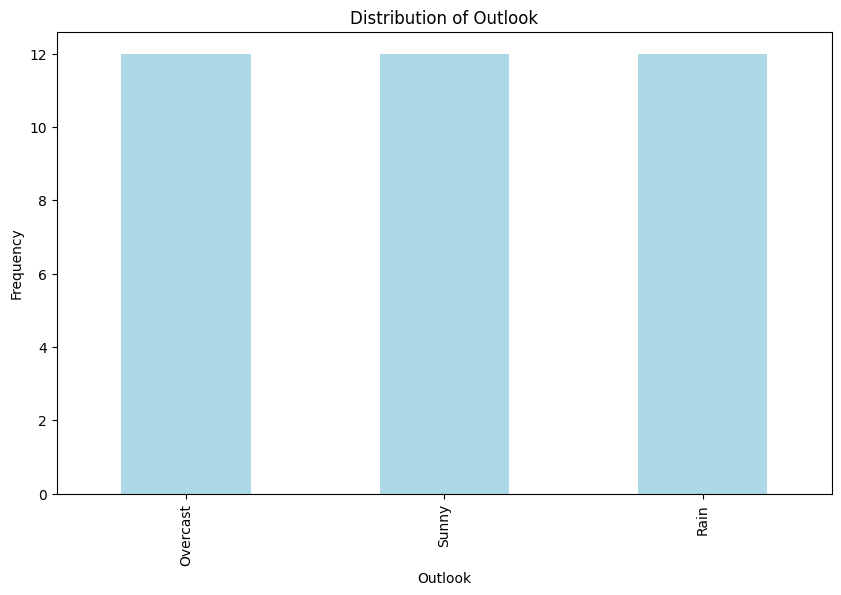

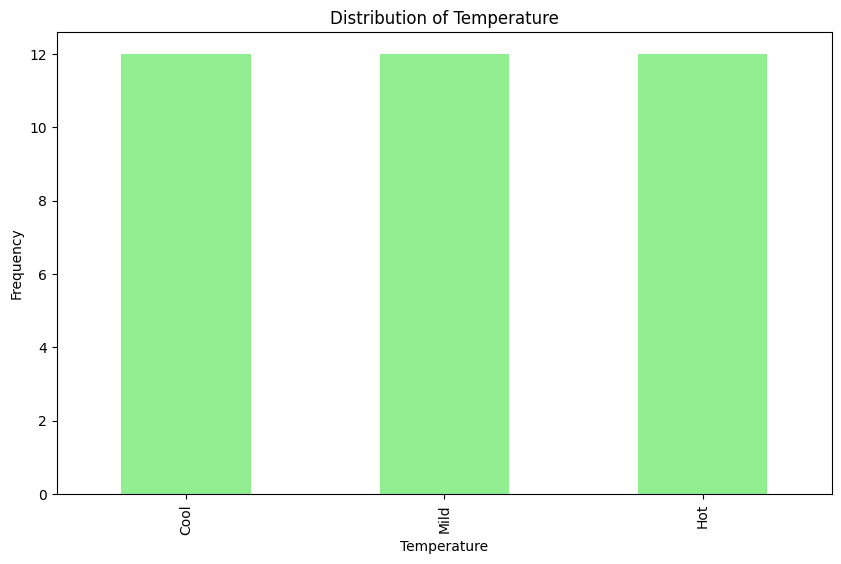

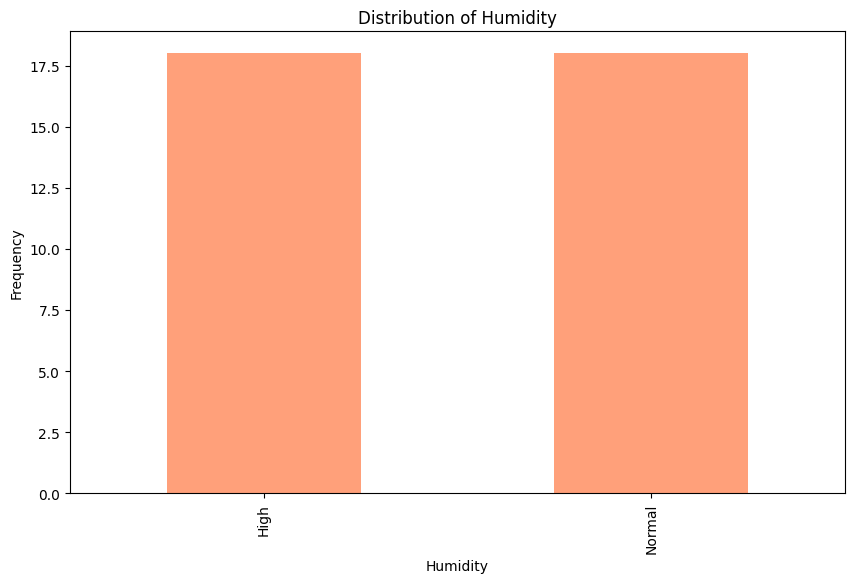

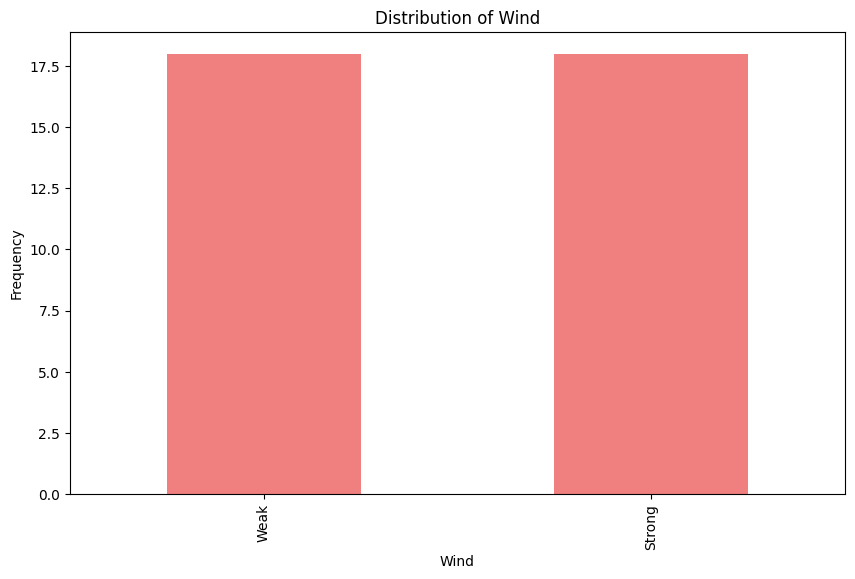

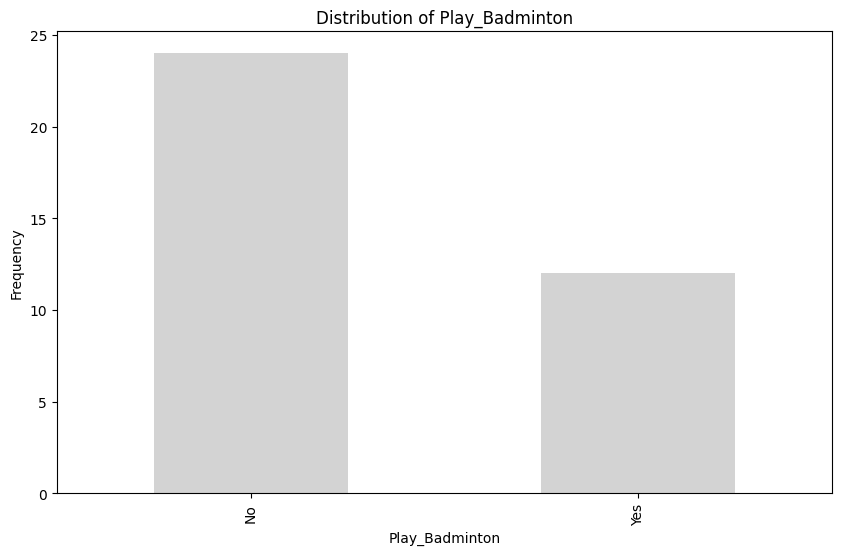

In [26]:
 plot_categorical_distribution(df, ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play_Badminton'], plot_type='bar', colors=custom_colors)


In [ ]:
# Checking dependencies of columns over play badminton features

In [ ]:
#a Chi-square test for independence between each feature column and the target variable 'Play_Badminton', excluding the target variable itself

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
for column in df.columns[:-1]:  # Exclude the target variable 'Play_Badminton'
    contingency_table = pd.crosstab(df['Play_Badminton'], df[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for independence between {column} and 'Play_Badminton':")
    print(f"Chi2 value: {chi2:.4f}, p-value: {p:.4f}")
    
    if p < 0.05: 
        print(f"The variable '{column}' is likely not independent of 'Play_Badminton'.")
    else:
        print(f"The variable '{column}' is likely independent of 'Play_Badminton'.")
    
    print()


Chi-square test for independence between Outlook and 'Play_Badminton':
Chi2 value: 9.0000, p-value: 0.0111
The variable 'Outlook' is likely not independent of 'Play_Badminton'.

Chi-square test for independence between Temperature and 'Play_Badminton':
Chi2 value: 0.0000, p-value: 1.0000
The variable 'Temperature' is likely independent of 'Play_Badminton'.

Chi-square test for independence between Humidity and 'Play_Badminton':
Chi2 value: 0.0000, p-value: 1.0000
The variable 'Humidity' is likely independent of 'Play_Badminton'.

Chi-square test for independence between Wind and 'Play_Badminton':
Chi2 value: 15.1250, p-value: 0.0001
The variable 'Wind' is likely not independent of 'Play_Badminton'.



In [ ]:
# therfore the weather has the dependencies on playing badmintn 


In [ ]:
#Relation Among the Columns 

In [28]:
def plot_categorical_relationships(df, columns):
    for col1, col2 in combinations(columns, 2):
        if col1 in df.columns and col2 in df.columns:
            plt.figure(figsize=(6, 4))
            crosstab = pd.crosstab(df[col1], df[col2], normalize='index') * 100  # Normalize to get percentages
            sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='.2f')  # Format to display two decimal places
            plt.title(f'Heatmap of {col1} vs {col2}')
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()
        else:
            print(f"One of the columns '{col1}' or '{col2}' not found in the DataFrame.")

In [30]:
#heatmap

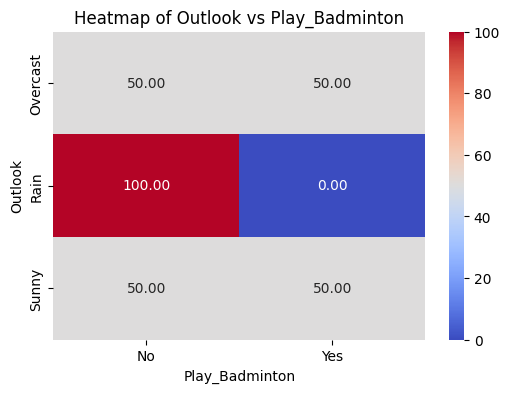

In [31]:
columns_to_plot = ['Outlook', 'Play_Badminton']
plot_categorical_relationships(df, columns_to_plot)

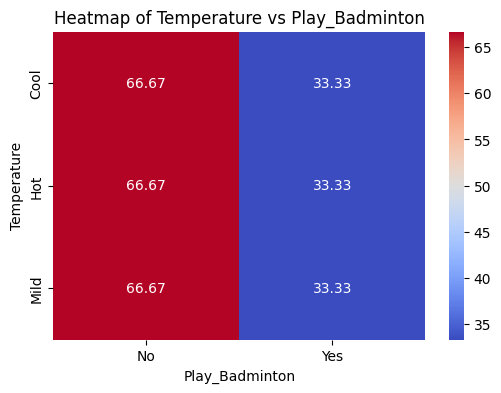

In [32]:
columns_to_plot = ['Temperature', 'Play_Badminton']

plot_categorical_relationships(df, columns_to_plot)

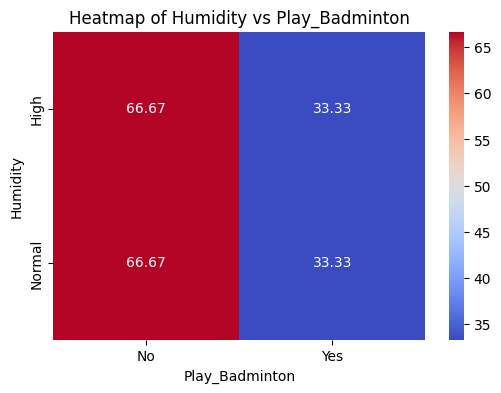

In [33]:
# List of columns to plot
columns_to_plot = ['Humidity', 'Play_Badminton']

plot_categorical_relationships(df, columns_to_plot)

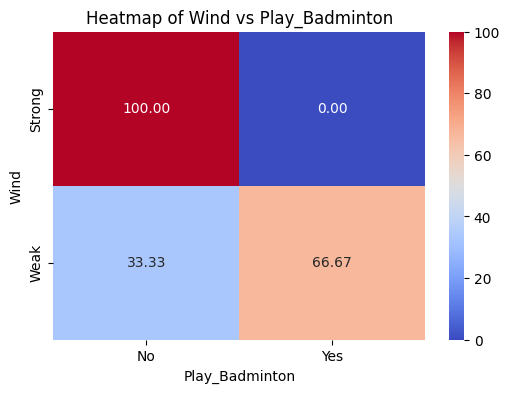

In [34]:
# List of columns to plot
columns_to_plot = ['Wind', 'Play_Badminton']

plot_categorical_relationships(df, columns_to_plot)

In [ ]:
"""`Following steps will be followed for the Data Prearation for Naive Bayes phase:`

1. If the dataset contains categorical variables, encode them to prepare for the Naive Bayes algorithm.

2. Split the dataset into training and testing sets.
"""

In [35]:
df.shape

(36, 5)

In [36]:
df_encoded = pd.get_dummies(df)

In [37]:
df_encoded.shape

(36, 12)

In [39]:
#### `The categorical Columns are encoded and the shape of the dataset has changed.`


In [40]:
# SPLITTING THE DATA SET
from sklearn.model_selection import train_test_split

X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#MODEL TRAINIG 
bnb_classifier = BernoulliNB()

bnb_classifier.fit(X_train, y_train)

y_pred = bnb_classifier.predict(X_test)


In [42]:
#MODEL EVALUATION# CONFUSION MATRIX

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[5 0]
 [0 3]]


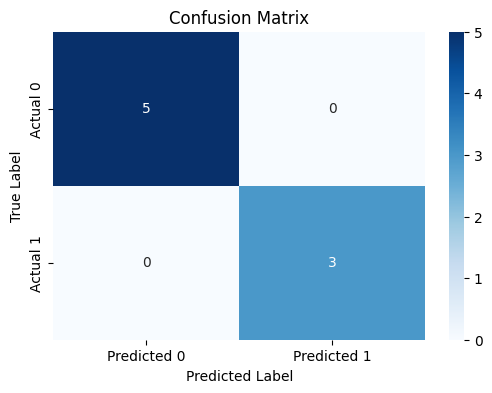

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
""""he evaluation metrics for the model are exceptional, with all metrics (accuracy, precision, recall, and F1 score) achieving perfect scores of 1.0. This indicates that the model has successfully classified all instances in the test set without any errors.

The confusion matrix further confirms this outstanding performance, showing that there are no misclassifications. Specifically, there are 5 instances correctly classified as negative (True Negatives) and 3 instances correctly classified as positive (True Positives), with no false positives or false negatives.

> In summary, the model demonstrates flawless performance on the test data, achieving perfect accuracy, precision, recall, and F1 score. This suggests that the model has learned the underlying patterns in the data extremely well and can make highly accurate predictions across both positive and negative classes.""""